In [7]:
#import scraping tool
from bs4 import BeautifulSoup
import requests

In [8]:
html_page = requests.get('http://books.toscrape.com/')

In [9]:
html_page.status_code == requests.codes.ok

True

In [10]:
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" t

In [11]:
warning = soup.find('div', class_='alert alert-warning')
warning

<div class="alert alert-warning" role="alert"><strong>Warning!</strong> This is a demo website for web scraping purposes. Prices and ratings here were randomly assigned and have no real meaning.</div>

In [12]:
titles = soup.find_all('h3')
titles

[<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>,
 <h3><a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>,
 <h3><a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a></h3>,
 <h3><a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>,
 <h3><a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a></h3>,
 <h3><a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a></h3>,
 <h3><a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a></h3>,
 <h3><a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/ind

In [13]:
titles[0].find('a').attrs['title']

'A Light in the Attic'

In [14]:
books_list = [title.find('a').attrs['title'] for title in soup.find_all('h3')]

In [15]:
import re
regex = re.compile('star-rating(.*)')
ratings = soup.find_all('p', {"class": regex})
ratings = [rating.attrs['class'][1] for rating in soup.find_all('p', {"class": regex})]
ratings

['Three',
 'One',
 'One',
 'Four',
 'Five',
 'One',
 'Four',
 'Three',
 'Four',
 'One',
 'Two',
 'Four',
 'Five',
 'Five',
 'Five',
 'Three',
 'One',
 'One',
 'Two',
 'Two']

In [16]:
star_dict = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, "Five": 5}
star_rating = [star_dict[s] for s in ratings]
star_rating

[3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2]

In [17]:
soup.find_all('p', class_="price_color")

[<p class="price_color">£51.77</p>,
 <p class="price_color">£53.74</p>,
 <p class="price_color">£50.10</p>,
 <p class="price_color">£47.82</p>,
 <p class="price_color">£54.23</p>,
 <p class="price_color">£22.65</p>,
 <p class="price_color">£33.34</p>,
 <p class="price_color">£17.93</p>,
 <p class="price_color">£22.60</p>,
 <p class="price_color">£52.15</p>,
 <p class="price_color">£13.99</p>,
 <p class="price_color">£20.66</p>,
 <p class="price_color">£17.46</p>,
 <p class="price_color">£52.29</p>,
 <p class="price_color">£35.02</p>,
 <p class="price_color">£57.25</p>,
 <p class="price_color">£23.88</p>,
 <p class="price_color">£37.59</p>,
 <p class="price_color">£51.33</p>,
 <p class="price_color">£45.17</p>]

In [18]:
price_list = [price.text for price in soup.find_all('p', class_="price_color")]
price_list

['£51.77',
 '£53.74',
 '£50.10',
 '£47.82',
 '£54.23',
 '£22.65',
 '£33.34',
 '£17.93',
 '£22.60',
 '£52.15',
 '£13.99',
 '£20.66',
 '£17.46',
 '£52.29',
 '£35.02',
 '£57.25',
 '£23.88',
 '£37.59',
 '£51.33',
 '£45.17']

In [19]:
#strip function is used to remove trailing and leading whitespaces
avails = [avail.text.strip() for avail in soup.find_all('p', class_="instock availability")]
avails

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock']

In [20]:
#Scraping images
images = soup.find_all('img')
#preview an image
ex_image = images[0]
ex_image


<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>

In [21]:
#selecting the image url
ex_image.attrs['src']

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

Saving Images Locally

In [22]:
import shutil
url_base = "http://books.toscrape.com/"
image_url = ex_image.attrs['src']
full_url = url_base + image_url
r = requests.get(full_url, stream=True)

with open('Images/book1cover', 'wb') as file:
    r.raw.decode_content = True
    shutil.copyfileobj(r.raw, file)

Previewing an Individual Image File

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, HTML
%matplotlib inline

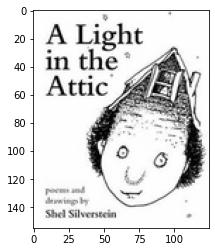

In [30]:
img = mpimg.imread('Images/book1cover')
imgplot = plt.imshow(img)
plt.show()

In [32]:
import pandas as pd
data = []
for n, img in enumerate(images):
    url_base = "http://books.toscrape.com/"
    url_ext = img.attrs['src']
    full_url = url_base + url_ext
    r = requests.get(full_url, stream=True)
    path = 'images/book{}.jpg'.format(n+1)
    title = img.attrs['alt']
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
        row = [title, '<img src="{}">'.format(path)]
        data.append(row)
df = pd.DataFrame(data)
print('Number of rows:', len(df))
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))

Number of rows: 20


,title,cover
0,A Light in the Attic,
1,Tipping the Velvet,
2,Soumission,
3,Sharp Objects,
4,Sapiens: A Brief History of Humankind,
5,The Requiem Red,
6,The Dirty Little Secrets of Getting Your Dream Job,
7,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",
8,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,
9,The Black Maria,


In [98]:
url = "https://en.wikipedia.org/wiki/List_of_counties_of_Kenya_by_GDP"
html_page = requests.get(url)
html_page.status_code

200

In [99]:
soup = BeautifulSoup(html_page.text, "html")
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of counties of Kenya by GDP - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-l

In [103]:
table_headers = soup.find_all('th')[:4]
table_headers = [header.text.strip() for header in table_headers]
table_headers

['Rank', 'County', 'GDP in KSh.\xa0millions/=', 'GDP in US$\xa0millions (PPP)']

In [104]:
df=  pd.DataFrame(columns=table_headers)
df

,Rank,County,GDP in KSh. millions/=,GDP in US$ millions (PPP)


In [116]:
table_rows = soup.find_all('tr')[1:48]
table_data = [row.text.strip() for row in table_rows]
table_data

['1\n\nNairobi County\n\n1,492,323\n\n27,798',
 '2\n\nNakuru county\n\n517,462\n\n10,333',
 '3\n\nKiambu County\n\n421,918\n\n8,425',
 '4\n\nMombasa County\n\n332,122\n\n6,632',
 '5\n\nNyandarua County\n\n245,203\n\n4,896',
 '6\n\nMachakos County\n\n232,860\n\n4,650',
 '7\n\nMeru County\n\n229,646\n\n4,585',
 '8\n\nKisumu County\n\n194,489\n\n3,883',
 '9\n\nBungoma County\n\n183,509\n\n3,664',
 '10\n\nKakamega County\n\n182,563\n\n3,645',
 '11\n\nNarok County\n\n179,226\n\n3,579',
 '12\n\nNyeri County\n\n174,961\n\n3,493',
 '13\n\nMuranga County\n\n173,018\n\n3,455',
 '14\n\nKisii County\n\n163,546\n\n3,266',
 '15\n\nUasin Gishu County\n\n162,273\n\n3,240',
 '16\n\nBomet County\n\n159,569\n\n3,186',
 '17\n\nElgeyo-Marakwet County\n\n159,531\n\n3,185',
 '18\n\nKericho County\n\n136,799\n\n2,732',
 '19\n\nNandi County\n\n119,691\n\n2,390',
 '20\n\nKilifi County\n\n119,295\n\n2,382',
 '21\n\nTrans-Nzoia County\n\n116,683\n\n2,330',
 '22\n\nHoma Bay County\n\n114,198\n\n2,280',
 '23\n\nKaj

In [118]:
cleaned_data = [entry.replace('\n\n', ',') for entry in table_data]
cleaned_data

['1,Nairobi County,1,492,323,27,798',
 '2,Nakuru county,517,462,10,333',
 '3,Kiambu County,421,918,8,425',
 '4,Mombasa County,332,122,6,632',
 '5,Nyandarua County,245,203,4,896',
 '6,Machakos County,232,860,4,650',
 '7,Meru County,229,646,4,585',
 '8,Kisumu County,194,489,3,883',
 '9,Bungoma County,183,509,3,664',
 '10,Kakamega County,182,563,3,645',
 '11,Narok County,179,226,3,579',
 '12,Nyeri County,174,961,3,493',
 '13,Muranga County,173,018,3,455',
 '14,Kisii County,163,546,3,266',
 '15,Uasin Gishu County,162,273,3,240',
 '16,Bomet County,159,569,3,186',
 '17,Elgeyo-Marakwet County,159,531,3,185',
 '18,Kericho County,136,799,2,732',
 '19,Nandi County,119,691,2,390',
 '20,Kilifi County,119,295,2,382',
 '21,Trans-Nzoia County,116,683,2,330',
 '22,Homa Bay County,114,198,2,280',
 '23,Kajiado County,107,805,2,153',
 '24,Embu County,103,734,2,071',
 '25,Nyamira County,103,239,2,061',
 '26,Kitui County,101,560,2,028',
 '27,Makueni County,100,924,2,015',
 '28,Kirinyaga County,100,836,2,01

In [120]:
df = pd.DataFrame(cleaned_data, columns=table_headers)

ValueError: Shape of passed values is (47, 1), indices imply (47, 4)